<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47337 entries, 0 to 47336
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Doctor Name            47337 non-null  object        
 1   Speciality             47326 non-null  object        
 2   Consult Type           46521 non-null  object        
 3   Appointment Date       47337 non-null  datetime64[ns]
 4   From Time              47337 non-null  object        
 5   StationName            46088 non-null  object        
 6   Source Of Appointment  14854 non-null  object        
 7   Age                    29316 non-null  float64       
 8   city                   29316 non-null  object        
 9   gender                 47337 non-null  object        
 10  attendence             47337 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 4.0+ MB
Doctor Name
False    47337
Name: count, dtype: int64


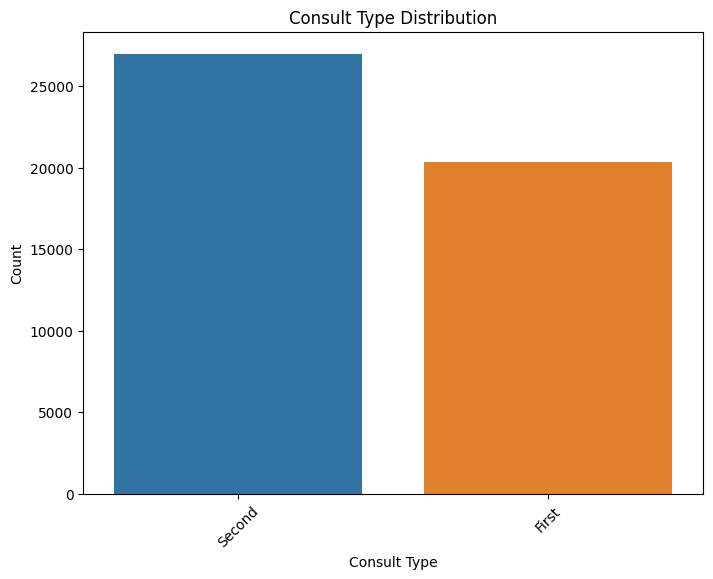

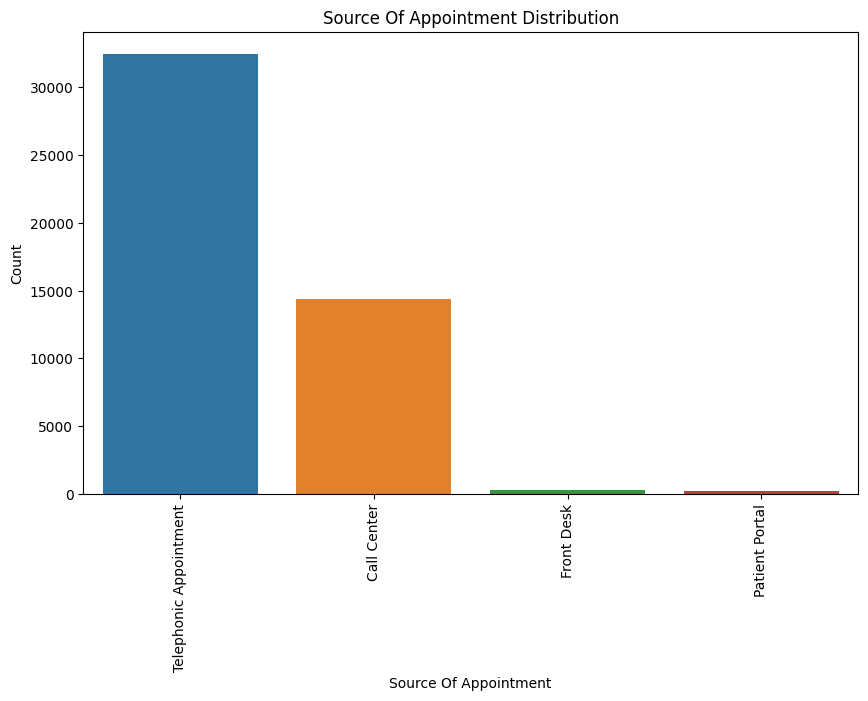

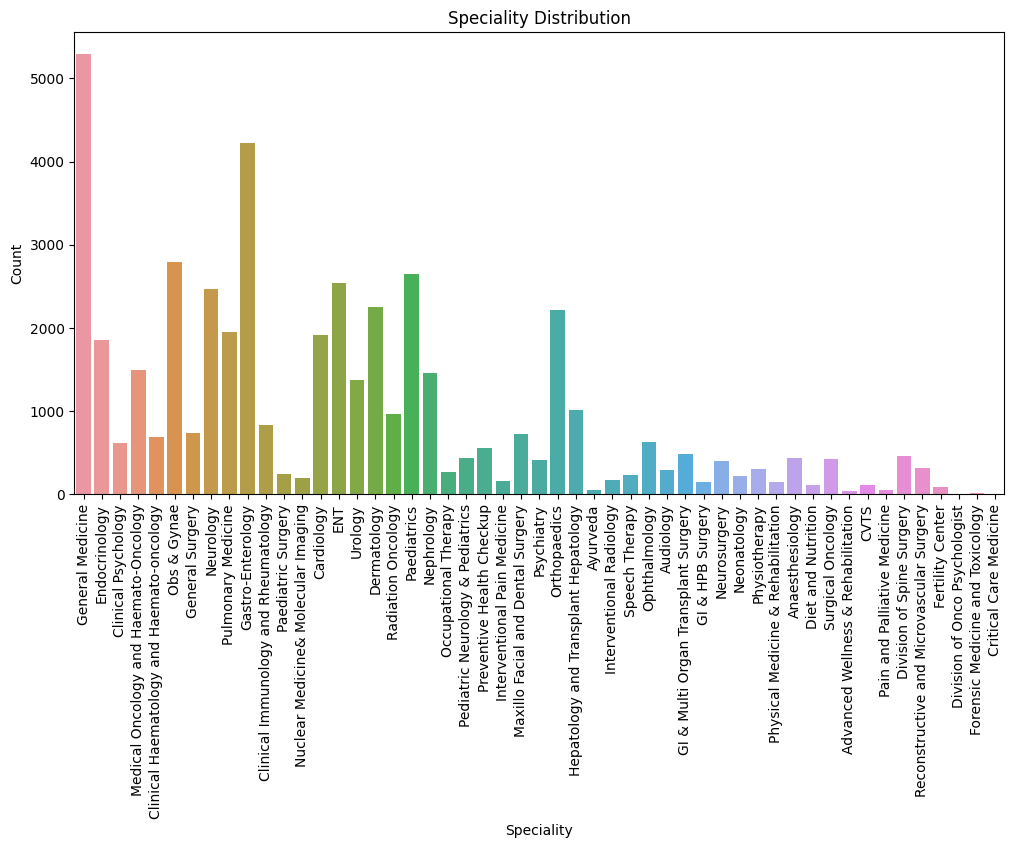

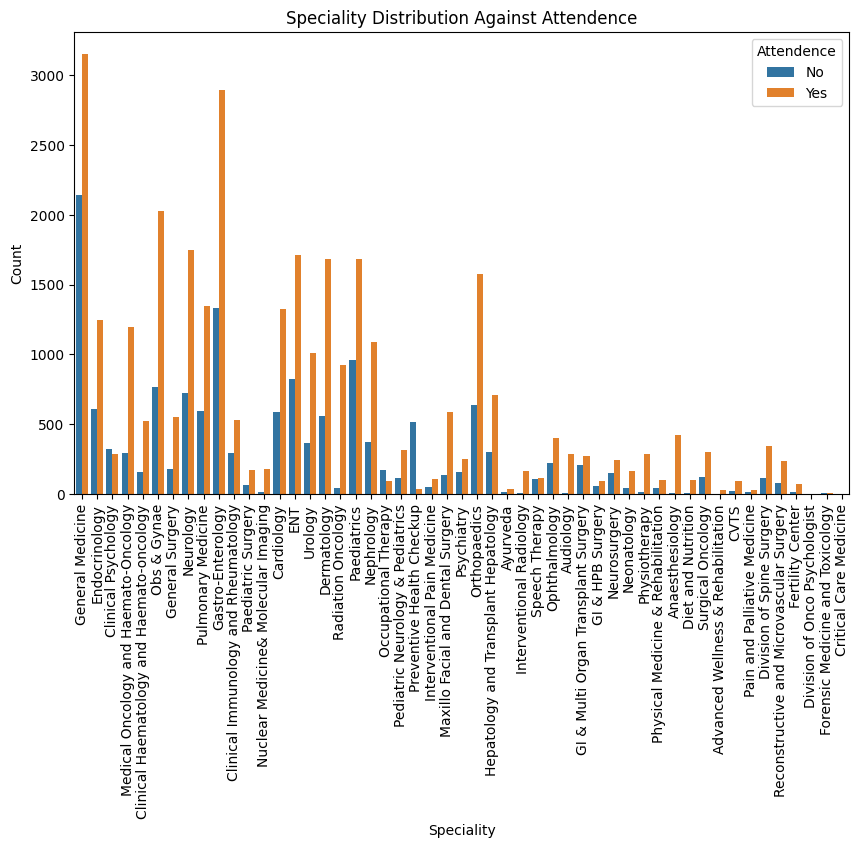

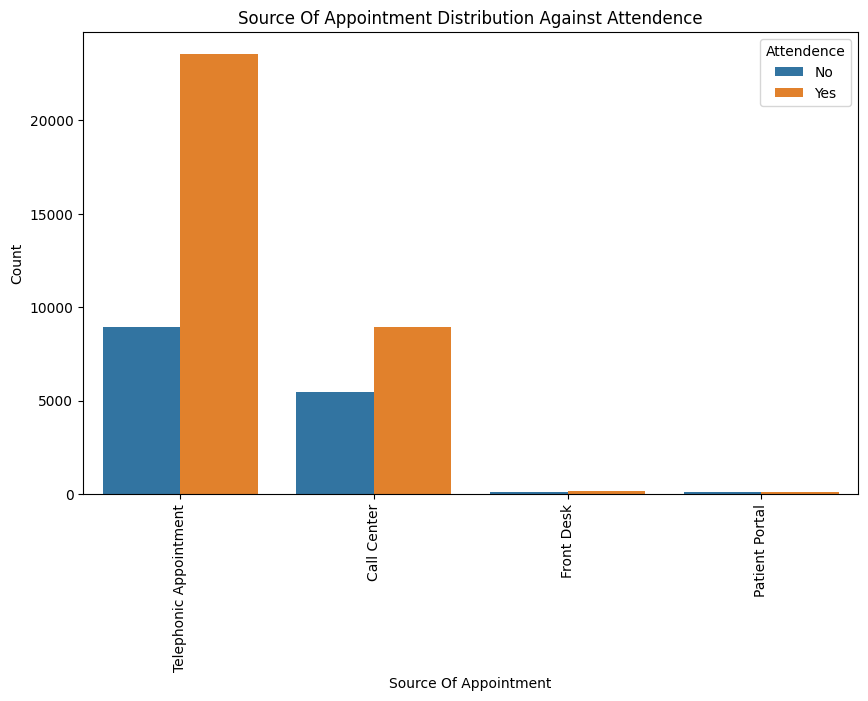

In [1]:

import pandas as pd
import numpy as np 
df=pd.read_excel('data.xls')
df.head(2)


df.drop('Remarks', axis=1, inplace=True )
df.drop('Appointment Operator', axis=1, inplace=True )
df.info()


headers = df.columns.to_list()


missing_data= df.isnull()


for column in headers:
    print(missing_data[column].value_counts())
    print("")


df.replace('', np.nan,inplace=True)



missing_data = df.isnull()
missing_data.head(5)


avg_age = df["Age"].astype('float').mean(axis=0)
print("Average of age :", avg_age)


df['Age'].replace(np.nan, avg_age,inplace=True)

df['gender'].replace('Male','1',inplace=True)
df['gender'].replace('female','0',inplace=True)

df['city'].replace(np.nan,"Ernakulam",inplace=True)



df['attendence'].replace('Billed','1', inplace=True)



df['attendence'].replace('Unbilled','0',inplace=True)



df['attendence'].replace('Cancelled','0',inplace=True)



pd.set_option('display.max_rows', None)
value_counts_df = df['Consult Type'].value_counts().reset_index()


value_counts_df.columns = ['Consult Type', 'Count']
value_counts_df


df['Consult Type'].replace('Follow up Consult','1',inplace=True)


df['Consult Type'].replace('Healthcheckup Consultation','1',inplace=True)


df['Consult Type'].replace('Fast track Consultation','1',inplace=True)


df['Consult Type'].replace('Post Discharge Consultation','1',inplace=True)


df['Consult Type'].replace('Telemedicine Consultation','1',inplace=True)


df['Consult Type'].replace('Initial Visit','0',inplace=True)



df['Consult Type'].value_counts().idxmax()


df['Consult Type'].replace(np.nan,'1',inplace=True)



df['Source Of Appointment'].replace('',np.nan,inplace=True)




df['Source Of Appointment'].value_counts()






df['Source Of Appointment'].replace(np.nan,'Telephonic Appointment', inplace=True)


df['Source Of Appointment'].value_counts()


df['Speciality'].value_counts().idxmax()



df['Speciality'].replace(np.nan,'General Medicine', inplace=True)



df['StationName'].value_counts()


df['StationName'].replace(np.nan,"Patient Relation ADT",inplace=True)


df.info()


import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.countplot(x='Consult Type', data=df)
plt.title('Consult Type Distribution')
plt.xlabel('Consult Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Source Of Appointment', data=df)
plt.title('Source Of Appointment Distribution')
plt.xlabel('Source Of Appointment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(12, 6))
sns.countplot(x='Speciality', data=df)
plt.title('Speciality Distribution')
plt.xlabel('Speciality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()



plt.figure(figsize=(10, 6))
sns.countplot(x='Speciality', hue='attendence', data=df)
plt.title('Speciality Distribution Against Attendence')
plt.xlabel('Speciality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Attendence', loc='upper right', labels=['No', 'Yes'])
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='Source Of Appointment', hue='attendence', data=df)
plt.title('Source Of Appointment Distribution Against Attendence')
plt.xlabel('Source Of Appointment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Attendence', loc='upper right', labels=['No', 'Yes'])
plt.show()



In [1]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import GridSearchCV, StratifiedKFold


df = pd.get_dummies(df, columns=['Doctor Name','Speciality','Appointment Date','From Time','StationName','Source Of Appointment','city'])


X = df.drop('attendence', axis=1)  # Features
y = df['attendence'] 






X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of logistic regression:", accuracy*100)

from sklearn.model_selection import cross_val_score




from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 150, 200, 250],  # Expand the range
    'max_depth': [None, 10, 20, 30, 40],  # Expand the range
    'min_samples_split': [2, 5, 10, 15, 20],  # Expand the range
    'min_samples_leaf': [1, 2, 4, 6, 8],  # Expand the range
    'max_features': ['sqrt', 'log2', None]  # Include None as well
} 


rf_classifier = RandomForestClassifier()
print('passed')
# Use StratifiedKFold for cross-validation (replace n_splits with your desired number of folds)
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print('passed2')
# Perform Grid Search Cross-Validation
grid_search_rf = GridSearchCV(rf_classifier, param_grid_rf, cv=stratified_kfold, n_jobs=-1)
print('passed3')
# Fit the GridSearchCV object with the training data
grid_search_rf.fit(X_train_scaled, y_train)
print('passed4')
# Access the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best parameters for Random Forest Classifier:", best_params_rf)


# Evaluate the model with the best hyperparameters
best_rf_model = grid_search_rf.best_estimator_
accuracy_rf = best_rf_model.score(X_test_scaled, y_test)
print("Random Forest Classifier Accuracy after tuning:", accuracy_rf * 100)





NameError: name 'pd' is not defined